In [1]:
from scoresbibm.utils.data_utils import query, get_summary_df, load_model
from scoresbibm.utils.plot import plot_metric_by_num_simulations, use_style,multi_plot

import matplotlib.pyplot as plt
import seaborn as sns

from scoresbibm.tasks.all_conditional_tasks import TwoMoonsAllConditionalTask
import jax
task = TwoMoonsAllConditionalTask()
reference_sampler = task.get_reference_sampler()

The history saving thread hit an unexpected error (DatabaseError('database disk image is malformed')).History will not be written to the database.


In [23]:
df = query("../../results/main_benchmark_all_cond", task="two_moons_all_cond", num_simulations=100000, method="score_transformer", method_sde_name = "vesde")

In [24]:
df

,method,task,num_simulations,seed,model_id,metric,value,time_train,time_eval,cfg
7,score_transformer,two_moons_all_cond,100000,0,7,c2st,0.511039,862.748242,10.317979,"{'name': 'main_benchmark_all_cond', 'seed': 0,..."


In [25]:
# Make some nice conditonal pictures!!!

model = load_model("../../results/main_benchmark_all_cond",df.index[0])

In [26]:
observation_stream = task.get_observation_generator()(jax.random.PRNGKey(0))
_, _, xs = next(observation_stream)

In [27]:
# Posterior
condition_mask_posterior = jax.numpy.array([False, False, True, True])
observation_posterior = xs[condition_mask_posterior]
condition_mask_partial_posterior = jax.numpy.array([False, False, True, False])
observation_partial_posterior = xs[condition_mask_partial_posterior]
condition_mask_partial_posterior2 = jax.numpy.array([False, False, False, True])
observation_partial_posterior2 = xs[condition_mask_partial_posterior]
condition_mask_partial_emulation = jax.numpy.array([True, False, False, True])
observation_partial_emulation = xs[condition_mask_partial_emulation]
condition_mask_partial_emulation2 = jax.numpy.array([True, False, True, False])
observation_partial_emulation2 = xs[condition_mask_partial_emulation2]
condition_mask_emulation = jax.numpy.array([True, True, False, False])
observation_emulation = xs[condition_mask_emulation]

In [29]:
samples1 = model.sample(20000, condition_mask=condition_mask_posterior, x_o=observation_posterior, rng=jax.random.PRNGKey(0))

In [30]:
samples2 = model.sample(50000, condition_mask=condition_mask_partial_posterior, x_o=observation_partial_posterior, rng=jax.random.PRNGKey(0))[:,:2]

In [31]:
samples3 = model.sample(50000, condition_mask=condition_mask_partial_posterior2, x_o=observation_partial_posterior2, rng=jax.random.PRNGKey(0))[:,:2]

In [32]:
samples4 = model.sample(20000, condition_mask=condition_mask_emulation, x_o=observation_emulation, rng=jax.random.PRNGKey(0))[:,:2]

In [33]:
samples5 = model.sample(20000, condition_mask=condition_mask_partial_emulation, x_o=observation_partial_emulation, rng=jax.random.PRNGKey(0))[:,:2]

In [34]:
samples6 = model.sample(20000, condition_mask=condition_mask_partial_emulation2, x_o=observation_partial_emulation2, rng=jax.random.PRNGKey(0))[:,:2]

findfont: Generic family 'sans-serif' not found because none of the following families were found: Arial
findfont: Font family ['sans-serif'] not found. Falling back to DejaVu Sans.
findfont: Generic family 'sans-serif' not found because none of the following families were found: Arial
findfont: Generic family 'sans-serif' not found because none of the following families were found: Arial
findfont: Generic family 'sans-serif' not found because none of the following families were found: Arial
findfont: Generic family 'sans-serif' not found because none of the following families were found: Arial
findfont: Generic family 'sans-serif' not found because none of the following families were found: Arial
findfont: Generic family 'sans-serif' not found because none of the following families were found: Arial


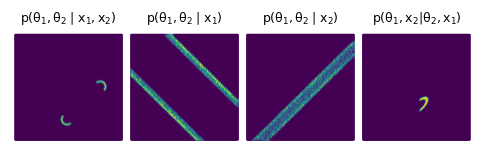

In [36]:
with use_style("pyloric"):
    fig, axes = plt.subplots(1,4, figsize=(6, 1.5))
    plt.subplots_adjust(wspace=-0.01)  # Adjust the space between subplots
    axes[0].hexbin(samples1[:,0], samples1[:,1], gridsize=200, rasterized=True, extent=[-1,1,-1,1], vmax=100.)
    axes[0].axes.xaxis.set_visible(False)
    axes[0].axes.yaxis.set_visible(False)
    axes[0].axes.spines['bottom'].set_visible(False)
    axes[0].axes.spines['left'].set_visible(False)
    axes[0].set_title(r"$p(\theta_1, \theta_2 \mid x_1, x_2)$")

    axes[1].hexbin(samples2[:,0], samples2[:,1], gridsize=200, rasterized=True,extent=[-1,1,-1,1], vmax=20.)
    axes[1].axes.xaxis.set_visible(False)
    axes[1].axes.yaxis.set_visible(False)
    axes[1].axes.spines['bottom'].set_visible(False)
    axes[1].axes.spines['left'].set_visible(False)
    axes[1].set_title(r"$p(\theta_1, \theta_2 \mid x_1)$")
    
    axes[2].hexbin(samples3[:,0], samples3[:,1], gridsize=200, rasterized=True,extent=[-1,1,-1,1], vmax=20.)
    axes[2].axes.xaxis.set_visible(False)
    axes[2].axes.yaxis.set_visible(False)
    axes[2].axes.spines['bottom'].set_visible(False)
    axes[2].axes.spines['left'].set_visible(False)
    axes[2].set_title(r"$p(\theta_1, \theta_2 \mid x_2)$")
    
    axes[3].hexbin(samples6[:,0], samples6[:,1], gridsize=200, rasterized=True, extent=[-1,1,-1,1.], vmax=100.)
    axes[3].axes.xaxis.set_visible(False)
    axes[3].axes.yaxis.set_visible(False)
    axes[3].axes.spines['bottom'].set_visible(False)
    axes[3].axes.spines['left'].set_visible(False)
    axes[3].set_title(r"$p(\theta_1, x_2|\theta_2, x_1)$")
    
    
    
    fig.savefig("fig3.svg", transparent=True, bbox_inches="tight")
    fig.savefig("fig3.png", transparent=True, bbox_inches="tight")
    plt.show()
